In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2022-11-29 01:21:27.093129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# fix random seed for reproducibility
tf.random.set_seed(7)

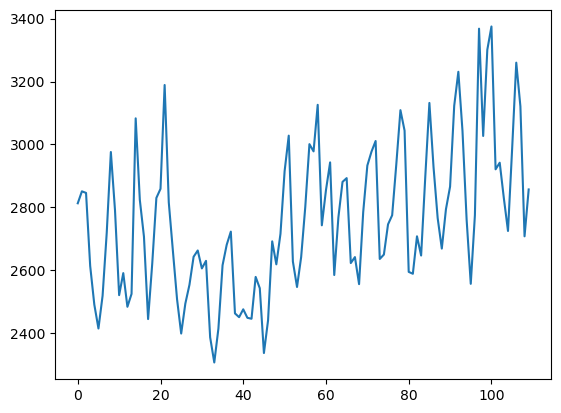

In [3]:
# Use a random dataset for testing
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('timeseries0.csv', usecols=[2], engine='python')
plt.plot(dataframe)
plt.show()

In [4]:
# Change the dataset format to float
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

73 37


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# print(trainX)

# for i in range(trainX.shape[0]):
#     print(i, trainX[i, 0], trainY[i])

In [8]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2022-11-29 01:21:29.748750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 01:21:29.749641: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
62/62 - 2s - loss: 0.1617 - 2s/epoch - 29ms/step
Epoch 2/100
62/62 - 0s - loss: 0.0631 - 243ms/epoch - 4ms/step
Epoch 3/100
62/62 - 0s - loss: 0.0370 - 254ms/epoch - 4ms/step
Epoch 4/100
62/62 - 0s - loss: 0.0333 - 258ms/epoch - 4ms/step
Epoch 5/100
62/62 - 0s - loss: 0.0323 - 259ms/epoch - 4ms/step
Epoch 6/100
62/62 - 0s - loss: 0.0315 - 297ms/epoch - 5ms/step
Epoch 7/100
62/62 - 0s - loss: 0.0305 - 274ms/epoch - 4ms/step
Epoch 8/100
62/62 - 0s - loss: 0.0301 - 333ms/epoch - 5ms/step
Epoch 9/100
62/62 - 0s - loss: 0.0289 - 365ms/epoch - 6ms/step
Epoch 10/100
62/62 - 0s - loss: 0.0286 - 365ms/epoch - 6ms/step
Epoch 11/100
62/62 - 0s - loss: 0.0278 - 341ms/epoch - 6ms/step
Epoch 12/100
62/62 - 0s - loss: 0.0269 - 333ms/epoch - 5ms/step
Epoch 13/100
62/62 - 0s - loss: 0.0267 - 334ms/epoch - 5ms/step
Epoch 14/100
62/62 - 0s - loss: 0.0260 - 325ms/epoch - 5ms/step
Epoch 15/100
62/62 - 0s - loss: 0.0254 - 297ms/epoch - 5ms/step
Epoch 16/100
62/62 - 0s - loss: 0.0249 - 308ms/epoc

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
print(trainY)
print(trainPredict)
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 23ms/step
[[2521.00007336 2590.99992863 2483.99989158 2525.00007236 3083.00006092
  2824.00006167 2706.99989979 2445.00009225 2621.00004849 2829.99993286
  2859.00011662 3188.99990725 2816.00006366 2661.00003854 2507.99988561
  2398.99997638 2494.00001641 2554.00000149 2642.9999157  2662.99991073
  2605.99998856 2629.99998259 2386.99997936 2306.99999925 2414.9999724
  2616.00011339 2681.00003357 2722.99989581 2462.99996046 2450.99996345
  2475.99989357 2449.00009126 2446.00002835 2578.99993162 2542.99994057
  2337.00011911 2441.00009325 2692.00009449 2618.99992167 2716.00008852
  2915.0001027  3028.00001094 2628.00011041 2546.99993957 2641.99997961
  2801.99993982 3000.999954   2977.99989606 3126.00011389 2742.99989084
  2855.00011762 2943.00009574 2585.00005744 2768.00007559 2880.99998384
  2892.99998085 2622.99992068 2641.99997961 2555.99987368 2785.00000771
  2932.99997091 2976.99995997]]
[[2653.3293]
 [2518.1172]
 [2580.0212]
 [2629.236 ]
 

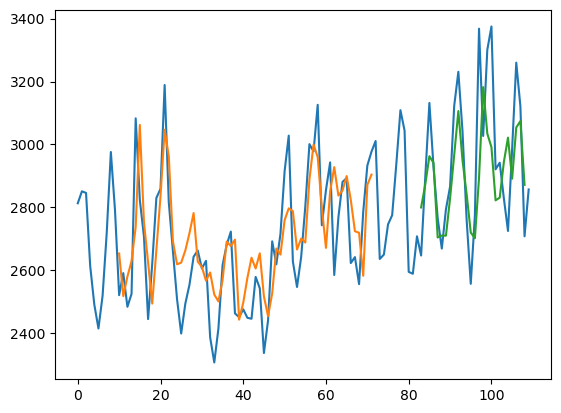

In [11]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()